In [1]:
import pandas as pd

In [2]:
diabetes=pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm=['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group=tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [11]:
#assigned_group=tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

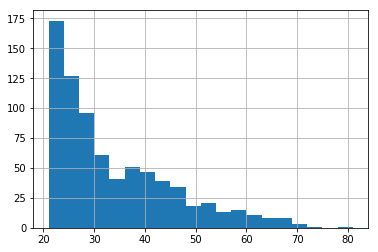

In [13]:
diabetes['Age'].hist(bins=20)

In [14]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70])

In [15]:
feat_cols=[num_preg,plasma_gluc,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [16]:
#Train Test Split

In [17]:
x_data=diabetes.drop('Class',axis=1)

In [18]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [19]:
labels=diabetes['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels, test_size=0.3, random_state=101)


In [22]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=100,shuffle=True)

In [23]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\Satish\\AppData\\Local\\Temp\\tmp6r6vra3l', '_save_summary_steps': 100, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5}


In [24]:
model.train(input_fn=input_func)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Satish\AppData\Local\Temp\tmp6r6vra3l\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 241.797
INFO:tensorflow:loss = 4.84904, step = 101 (0.414 sec)
INFO:tensorflow:global_step/sec: 301.112
INFO:tensorflow:loss = 6.96951, step = 201 (0.348 sec)
INFO:tensorflow:global_step/sec: 286.209
INFO:tensorflow:loss = 6.98328, step = 301 (0.334 sec)
INFO:tensorflow:global_step/sec: 298.54
INFO:tensorflow:loss = 4.62481, step = 401 (0.335 sec)
INFO:tensorflow:global_step/sec: 301.68
INFO:tensorflow:loss = 4.17824, step = 501 (0.347 sec)
INFO:tensorflow:global_step/sec: 297.143
INFO:tensorflow:loss = 5.53744, step = 601 (0.332 sec)
INFO:tensorflow:global_step/sec: 296.056
INFO:tensorflow:loss = 4.92798, step = 701 (0.326 sec)
INFO:tensorflow:global_step/sec: 315.619
INFO:tensorflow:loss = 4.57203, step = 801 (0.331 sec)
INFO:tensorflow:global_step/sec: 319.052
INF

In [25]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [26]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-08-01-21:35:51
INFO:tensorflow:Restoring parameters from C:\Users\Satish\AppData\Local\Temp\tmp6r6vra3l\model.ckpt-5370
INFO:tensorflow:Finished evaluation at 2018-08-01-21:35:53
INFO:tensorflow:Saving dict for global step 5370: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.827819, auc_precision_recall = 0.691717, average_loss = 0.495046, global_step = 5370, label/mean = 0.350649, loss = 4.76482, prediction/mean = 0.360695


In [27]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82781887,
 'auc_precision_recall': 0.69171673,
 'average_loss': 0.49504638,
 'global_step': 5370,
 'label/mean': 0.35064936,
 'loss': 4.7648215,
 'prediction/mean': 0.36069521}

In [28]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [29]:
predictions=model.predict(pred_input_func)

In [30]:
my_pred=list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\Satish\AppData\Local\Temp\tmp6r6vra3l\model.ckpt-5370


In [31]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.4929131], dtype=float32),
  'logits': array([-0.02834964], dtype=float32),
  'probabilities': array([ 0.50708693,  0.49291307], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.71814936], dtype=float32),
  'logits': array([ 0.93530035], dtype=float32),
  'probabilities': array([ 0.28185064,  0.71814936], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34201485], dtype=float32),
  'logits': array([-0.65432811], dtype=float32),
  'probabilities': array([ 0.65798515,  0.34201488], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34074068], dtype=float32),
  'logits': array([-0.65999532], dtype=float32),
  'probabilities': array([ 0.65925932,  0.34074065], dtype=floa

In [32]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\Satish\\AppData\\Local\\Temp\\tmpjjkpcpq1', '_save_summary_steps': 100, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5}


In [33]:
embedded_group_col=tf.feature_column.embedding_column(assigned_group,dimension=4)

In [34]:
feat_cols=[num_preg,plasma_gluc,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [35]:
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=100,shuffle=True)

In [36]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\Satish\\AppData\\Local\\Temp\\tmp7ym6irc_', '_save_summary_steps': 100, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5}


In [37]:
dnn_model.train(input_fn=input_func,steps=100)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Satish\AppData\Local\Temp\tmp7ym6irc_\model.ckpt.
INFO:tensorflow:loss = 6.68752, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\Satish\AppData\Local\Temp\tmp7ym6irc_\model.ckpt.
INFO:tensorflow:Loss for final step: 4.23992.


In [38]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [39]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-08-01-22:31:35
INFO:tensorflow:Restoring parameters from C:\Users\Satish\AppData\Local\Temp\tmp7ym6irc_\model.ckpt-100
INFO:tensorflow:Finished evaluation at 2018-08-01-22:31:36
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.701299, accuracy_baseline = 0.649351, auc = 0.717778, auc_precision_recall = 0.542414, average_loss = 0.582065, global_step = 100, label/mean = 0.350649, loss = 5.60237, prediction/mean = 0.323787


{'accuracy': 0.70129871,
 'accuracy_baseline': 0.64935064,
 'auc': 0.71777779,
 'auc_precision_recall': 0.54241383,
 'average_loss': 0.58206457,
 'global_step': 100,
 'label/mean': 0.35064936,
 'loss': 5.6023712,
 'prediction/mean': 0.32378724}